If you succeeded to run the feature-based tracking software, you now have a SQLite database as result (you can clone this repository or download from the data directory of the repository the [archive](https://bitbucket.org/Nicolas/trafficintelligence/src/master/data/12-laurier.zip) containing the `laurier.sqlite` database). 

The analysis modules are written in Python (see the [documentation](./README.md) to get the provided Python code to work). The functions to load trajectories are in the `storage` module. Assuming the `12-laurier.zip` archive has been unzipped in the data directory, `laurier.sqlite` is in `data/12-laurier` and loading moving object trajectories is done in the cell below:

In [1]:
from trafficintelligence import storage
objects = storage.loadTrajectoriesFromSqlite('../data/12-laurier/laurier.sqlite', 'object')

This will load all moving object trajectories from the database in a list of instances of the class `MovingObject` (module `moving`), which have the fields positions and velocities which are instances of `Trajectory` (module `moving`), trajectories which are series of $(x,y)$ coordinates, a first and a last instant (measured in frames). The velocity is also 2-dimensional since it is a vector (the speed vector). The speed is its norm. The cell below shows  how to compute the speed at instant 10 for object 0 (in unit of distance per frame, ie meters for the `laurier.sqlite` if one used the provided homography).

The third, fourth and fifth lines all compute the speeds of the object (note that, although there are only $n-1$ displacements that can be computed based on $n$ positions, the velocities have their last element duplicated to have the same length as the positions). Note also that the `Trajectory` objects are iterable (as well as `TimeInterval`). 

In [2]:
speed = objects[0].getVelocityAtInstant(10).norm2()
timeInterval = objects[0].getTimeInterval()
speeds = [objects[0].getVelocityAtInstant(t).norm2() for t in range(timeInterval.first, timeInterval.last+1)]
speeds = [v.norm2() for v in objects[0].getVelocities()]
speeds = objects[0].getSpeeds()

The cell below shows how to plot the speed as a function of time, using the `matplotlib` library.

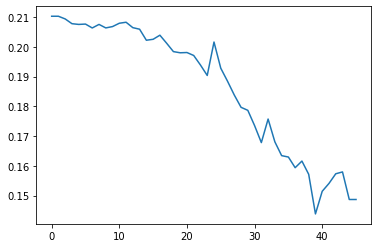

In [3]:
import matplotlib.pyplot as plt
plt.plot(range(timeInterval.first, timeInterval.last+1), speeds)

Finally, plotting a trajectory with its origin as a red dot (option `withOrigin=True`) is done in the cell below (in a script, one should either clear the figure using `plt.clf()`, close it using `plt.close()` or create a new one using `plt.figure()`, otherwise it will be added to the previous plot). The second line makes the $x$ and $y$ scales equal. 

(48.12032354545454, 55.76594840259741, 21.858648668831172, 28.284877954545454)

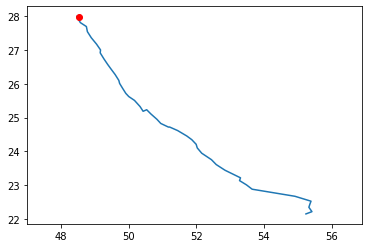

In [4]:
objects[0].plot(withOrigin=True)
plt.axis('equal')

Features, i.e. the trajectories of the points tracked on each moving object can be loaded and associated to the corresponding object as shown in the cell below. The advantage of these trajectories is that they are of higher quality, in particular much s
moother (the default object trajectory is simply the average position of the feature positions at each instant; the same is done, but intrinsically better, for velocities). 

The same function `loadTrajectoriesFromSqlite` (module `storage`) is used, returning the same data types, a list of instances of `MovingObject`. The feature instances can be linked to the objects using the list of features ids that constitute an object in the featureNumbers field of a `MovingObject`. On the second line, the `setFeatures` method of `MovingObject` stores references to the feature instances in its `features` field (which is a list). 

Finally, there is a last optional parameter in `loadTrajectoriesFromSqlite` to control the number of moving objects or features to load (default is -1 which will load everything from the database). 

In [5]:
features = storage.loadTrajectoriesFromSqlite('../data/12-laurier/laurier.sqlite', 'feature')
objects[0].setFeatures(features)

Features of an object can be plotted as shown in the cell below.

(43.19206, 56.43254, 21.64179, 31.33081)

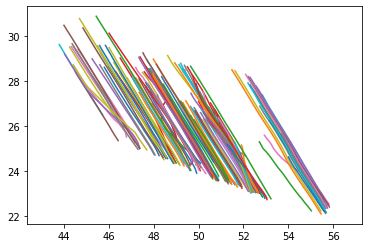

In [6]:
for f in objects[0].features:
    f.plot()
plt.axis('equal')

The plot method can take a simple string argument like the matplotlib plot function, e.g. `bx-` for connected blue crosses. The cell below shows how to plot all the moving objects from the `objects` list.

(-9.436886, 58.733766, 19.6085075, 72.3093425)

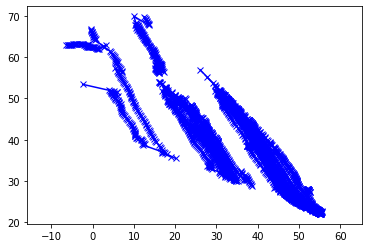

In [7]:
for o in objects:
    o.plot('bx-')
plt.axis('equal')

One can extract various statistics from the object speeds and display them.

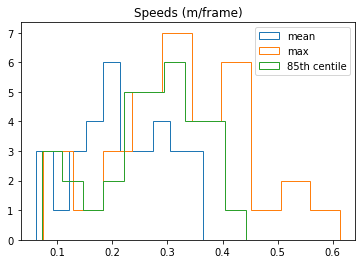

In [8]:
import numpy as np
meanSpeeds = []
maxSpeeds = []
speeds85 = []
for o in objects:
    speeds = o.getSpeeds()
    meanSpeeds.append(np.mean(speeds))
    maxSpeeds.append(np.max(speeds))
    speeds85.append(np.quantile(speeds, 0.85))
plt.hist(meanSpeeds, histtype = 'step', label = 'mean') # n , bins, _ = 
plt.title('Speeds (m/frame)')
plt.hist(maxSpeeds, histtype = 'step', label = 'max')
plt.hist(speeds85, histtype = 'step', label = '85th centile')
plt.legend()